In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from time import sleep
%matplotlib notebook

In [9]:
def draw_trapezoid(ax, base1, base2, height, offset, colors, n_points=160):
    # Calculate coordinates of the trapezoid
    x1, y1 = offset, 2
    x2, y2 = x1 + base2, 2
    x3, y3 = x1 + (base2 - base1) / 2, height
    x4, y4 = x2 - (base2 - base1) / 2, height

    side_lengths = [
        40, 20, 40, 60,
    ]

    # Interpolate points along the edges
    left_side_x = np.linspace(x1, x3, side_lengths[0])
    left_side_y = np.linspace(y1, y3, side_lengths[0])
    top_side_x = np.linspace(x3, x4, side_lengths[1])
    top_side_y = np.linspace(y3, y4, side_lengths[1])
    right_side_x = np.linspace(x2, x4, side_lengths[2])
    right_side_y = np.linspace(y2, y4, side_lengths[2])
    bottom_side_x = np.linspace(x1, x2, side_lengths[3])
    bottom_side_y = np.linspace(y1, y2, side_lengths[3])

    # Combine points
    x_points = np.concatenate(
        [left_side_x, top_side_x, right_side_x, bottom_side_x])
    y_points = np.concatenate(
        [left_side_y, top_side_y, right_side_y, bottom_side_y])

    # Mark the interpolated points
    ax.scatter(x_points, y_points, s=10, c=colors)

In [25]:
def draw_tapestries(colors, fig, ax):
    # Common height for all trapezoids
    height = 7

    colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

    # Draw multiple trapezoids
    for i in range(6):
        draw_trapezoid(ax, 3, 5, height, i * 6 + 3, colors[160 * i: 160 * (i + 1)])

In [26]:
n_leds = [
    160,
    160,
    160,
    160,
    160,
    160,
]

side_lengths = [
    40, 20, 40, 60,
]

N_LEDS = sum(n_leds)


def side_index(tapestry_idx, idx, side, direction):
    tapestry_padding = 0

    i = 0
    while i < tapestry_idx:
        tapestry_padding += n_leds[i]

        i += 1

    side_padding = 0
    i = 0
    while i < side:
        side_padding += side_lengths[i]

        i += 1

    if idx >= side_lengths[side]:
        return N_LEDS

    if direction == 0:
        return tapestry_padding + side_padding + idx
    else:
        return tapestry_padding + side_padding + (side_lengths[side] - idx)

In [47]:
def simulate_leds(update_fn, fig_size_multiplier=2):
    # set parameters
    frames = 1000

    # init the figure
    fig, ax = plt.subplots(figsize=(9 * fig_size_multiplier, 5 * fig_size_multiplier))

    def _update(i):
        # clear the axis each frame
        ax.clear()

        colors = update_fn(i)

        draw_tapestries(colors, fig, ax)

        # Set limits and labels
        ax.set_xlim(0, 40)
        ax.set_ylim(0, 10)
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_title('Trapezoids with 160 Points Each')

    return animation.FuncAnimation(fig, _update, frames=frames, interval=50)

In [52]:
def turn(tapestry_idx, colors, color):
    padding = sum(n_leds[i] for i in range(tapestry_idx))

    for i in range(n_leds[tapestry_idx]):
        colors[padding + i] = color

In [74]:
def circling_dot(i):
    # pattern changing
    colors = [(0, 0, 0) for _ in range(160 * 6 + 1)]

    # 0 to 1
    pattern_progress = (i % 100) / 100.0

    tapestry_progress = (pattern_progress * 6) % 1
    tapestry_idx = int(pattern_progress * 6)


    side = 1
    side_idx = int(tapestry_progress * side_lengths[side])
    transformed_idx = side_index(tapestry_idx, side_idx, side, 0)
    colors[transformed_idx] = [255, 0, 0]

    side = 3
    side_idx = int(tapestry_progress * side_lengths[side])
    transformed_idx = side_index(tapestry_idx, side_idx, side, 0)
    colors[transformed_idx] = [255, 0, 0]

    return colors

In [75]:
def circular_idx(idx, side):
    tapestry_idx = idx // side_lengths[side]

    side_idx = idx % side_lengths[side]

    transformed_idx = side_index(tapestry_idx, side_idx, side, 0)
    return transformed_idx

In [99]:
# pulse(i % 10, 5)
# min value will be 0 max will be 5
def pulse(n, max_val):
    if n > max_val:
        n -= max_val * 2
        n *= -1

    return n

In [101]:
def circling_pulse(idx):
    colors = [(0, 0, 0) for _ in range(160 * 6 + 1)]

    side = 0
    maximum = side_lengths[side] * 6

    n_dots = 20
    for t in range(n_dots):
        i = (idx + t) % maximum
        transformed_idx = circular_idx(i, side)

        intensity = pulse(t, n_dots / 2) / (n_dots / 2)
        color = 255 * pow(intensity, 1.3)
        colors[transformed_idx] = [color, 0, 0]

    return colors

<IPython.core.display.Javascript object>


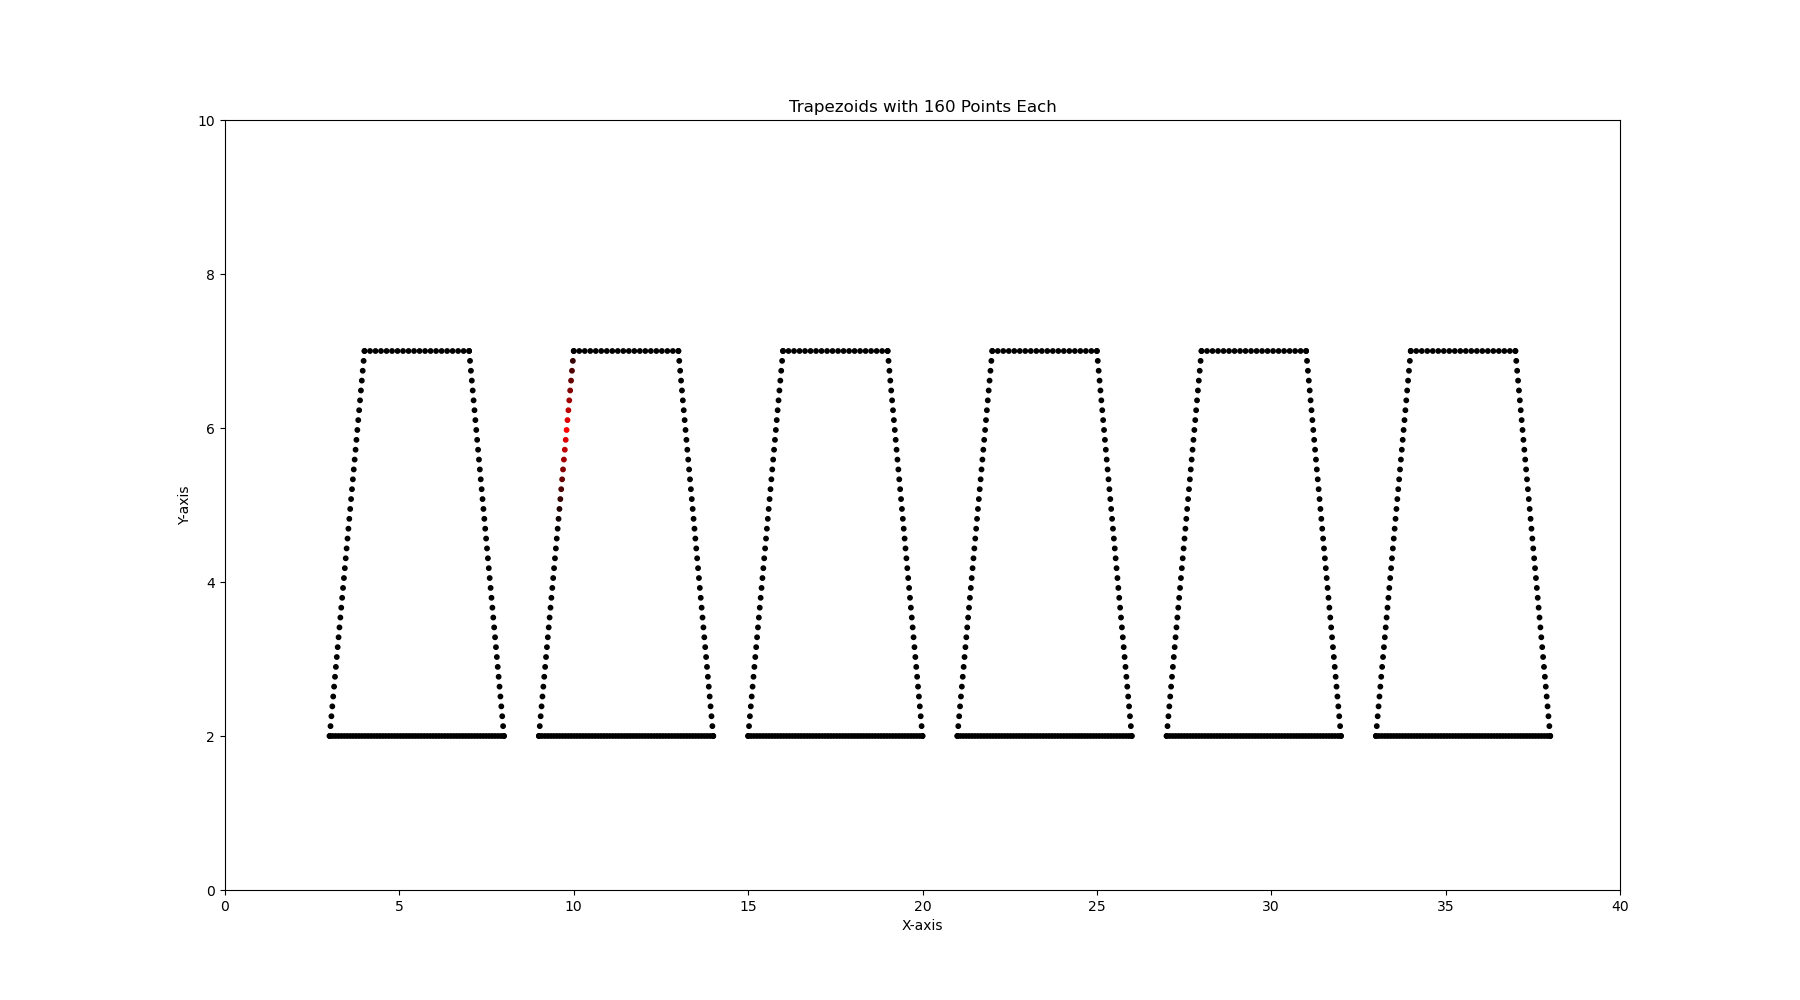

In [102]:
simulate_leds(circling_top_dot)